In [18]:
%matplotlib notebook

import os
import glob
from matplotlib import pyplot as plt
from matplotlib import colors
import numpy as np
import pandas as pd
from astropy.io import fits
import yaml

from donutlib.decamutil import decaminfo
dinfo = decaminfo()


In [3]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def add_colorbar(mappable):
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.sca(last_axes)
    return cbar

In [16]:
def mkProfile(xarr,yarr,nx=100,xmin=0.,xmax=1.0,ymin=0.,ymax=1.0,retPlot=True):
    dx = (xmax-xmin)/nx
    bins = np.arange(xmin,xmax+dx,dx)
    nbin = len(bins)-1
    #print(dx,bins,nbin)
    inrange = (yarr>=ymin) & (yarr<ymax)
    yinrange = yarr[inrange]
    xinrange = xarr[inrange]
    ind = np.digitize(xinrange,bins) - 1.   #np.digitize starts at bin=1
    xval = np.zeros(nbin)
    xerr = np.zeros(nbin)
    yval = np.zeros(nbin)
    yerr = np.zeros(nbin)
    for i in range(nbin):
        inbin = (ind==i)
        xinbin = xinrange[inbin]
        yinbin = yinrange[inbin]
        nentries = len(yinbin)
        xval[i] = 0.5*(bins[i+1]+bins[i])
        xerr[i] = 0.5*(bins[i+1]-bins[i])
        if nentries>0:
            yval[i] = np.mean(yinbin)
            yerr[i] = np.std(yinbin)/np.sqrt(nentries)
            #print(i,xval[i],xerr[i],yval[i],yerr[i])
    if retPlot:
        profile = plt.errorbar(xval,yval,xerr=xerr,yerr=yerr)
        return profile
    else:
        return xval,yval,xerr,yerr




In [8]:
if False:
    weblocation = "https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02/"
    localdisk = "/u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350"

    bands = ['g','r','i','z','Y']
    for aband in bands:
        for ccdnum in range(1,62+1):
            filename = "D_n20151113t1123_%s_c%02d_r2350p02_norm-dflatcor.fits" % (aband,ccdnum)     
            command = "wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O %s/%s %s/%s" % (localdisk,filename,weblocation,filename)
            os.system(command)
            print(command)

wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_g_c01_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02//D_n20151113t1123_g_c01_r2350p02_norm-dflatcor.fits
wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_g_c02_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02//D_n20151113t1123_g_c02_r2350p02_norm-dflatcor.fits
wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_g_c03_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.

wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_g_c23_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02//D_n20151113t1123_g_c23_r2350p02_norm-dflatcor.fits
wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_g_c24_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02//D_n20151113t1123_g_c24_r2350p02_norm-dflatcor.fits
wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_g_c25_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.

wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_g_c45_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02//D_n20151113t1123_g_c45_r2350p02_norm-dflatcor.fits
wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_g_c46_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02//D_n20151113t1123_g_c46_r2350p02_norm-dflatcor.fits
wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_g_c47_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.

wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_r_c05_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02//D_n20151113t1123_r_c05_r2350p02_norm-dflatcor.fits
wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_r_c06_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02//D_n20151113t1123_r_c06_r2350p02_norm-dflatcor.fits
wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_r_c07_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.

wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_r_c27_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02//D_n20151113t1123_r_c27_r2350p02_norm-dflatcor.fits
wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_r_c28_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02//D_n20151113t1123_r_c28_r2350p02_norm-dflatcor.fits
wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_r_c29_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.

wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_r_c49_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02//D_n20151113t1123_r_c49_r2350p02_norm-dflatcor.fits
wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_r_c50_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02//D_n20151113t1123_r_c50_r2350p02_norm-dflatcor.fits
wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_r_c51_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.

wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_i_c09_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02//D_n20151113t1123_i_c09_r2350p02_norm-dflatcor.fits
wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_i_c10_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02//D_n20151113t1123_i_c10_r2350p02_norm-dflatcor.fits
wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_i_c11_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.

wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_i_c31_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02//D_n20151113t1123_i_c31_r2350p02_norm-dflatcor.fits
wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_i_c32_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02//D_n20151113t1123_i_c32_r2350p02_norm-dflatcor.fits
wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_i_c33_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.

wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_i_c53_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02//D_n20151113t1123_i_c53_r2350p02_norm-dflatcor.fits
wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_i_c54_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02//D_n20151113t1123_i_c54_r2350p02_norm-dflatcor.fits
wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_i_c55_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.

wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_z_c13_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02//D_n20151113t1123_z_c13_r2350p02_norm-dflatcor.fits
wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_z_c14_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02//D_n20151113t1123_z_c14_r2350p02_norm-dflatcor.fits
wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_z_c15_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.

wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_z_c35_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02//D_n20151113t1123_z_c35_r2350p02_norm-dflatcor.fits
wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_z_c36_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02//D_n20151113t1123_z_c36_r2350p02_norm-dflatcor.fits
wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_z_c37_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.

wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_z_c57_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02//D_n20151113t1123_z_c57_r2350p02_norm-dflatcor.fits
wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_z_c58_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02//D_n20151113t1123_z_c58_r2350p02_norm-dflatcor.fits
wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_z_c59_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.

wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_Y_c17_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02//D_n20151113t1123_Y_c17_r2350p02_norm-dflatcor.fits
wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_Y_c18_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02//D_n20151113t1123_Y_c18_r2350p02_norm-dflatcor.fits
wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_Y_c19_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.

wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_Y_c39_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02//D_n20151113t1123_Y_c39_r2350p02_norm-dflatcor.fits
wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_Y_c40_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02//D_n20151113t1123_Y_c40_r2350p02_norm-dflatcor.fits
wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_Y_c41_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.

wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_Y_c61_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02//D_n20151113t1123_Y_c61_r2350p02_norm-dflatcor.fits
wget --no-check-certificate --http-user=roodman --http-password=FITdonuts123 -nc -nd -nH  -np -nv --cut-dirs=3 -O /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_Y_c62_r2350p02_norm-dflatcor.fits https://desar2.cosmology.illinois.edu/DESFiles/desarchive/OPS/cal/norm-dflatcor/20151113t1123-r2350/p02//D_n20151113t1123_Y_c62_r2350p02_norm-dflatcor.fits


In [4]:
iband_flat = fits.open("/u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_i_c01_r2350p02_norm-dflatcor.fits")
iband_flat.info()

Filename: /u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/D_n20151113t1123_i_c01_r2350p02_norm-dflatcor.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  SCI           1 PrimaryHDU     144   (2048, 4096)   float32   
  1  DUMMY         1 ImageHDU         8   (1, 1)   float64   
  2  WGT           1 ImageHDU        13   (2048, 4096)   float32   


<IPython.core.display.Javascript object>


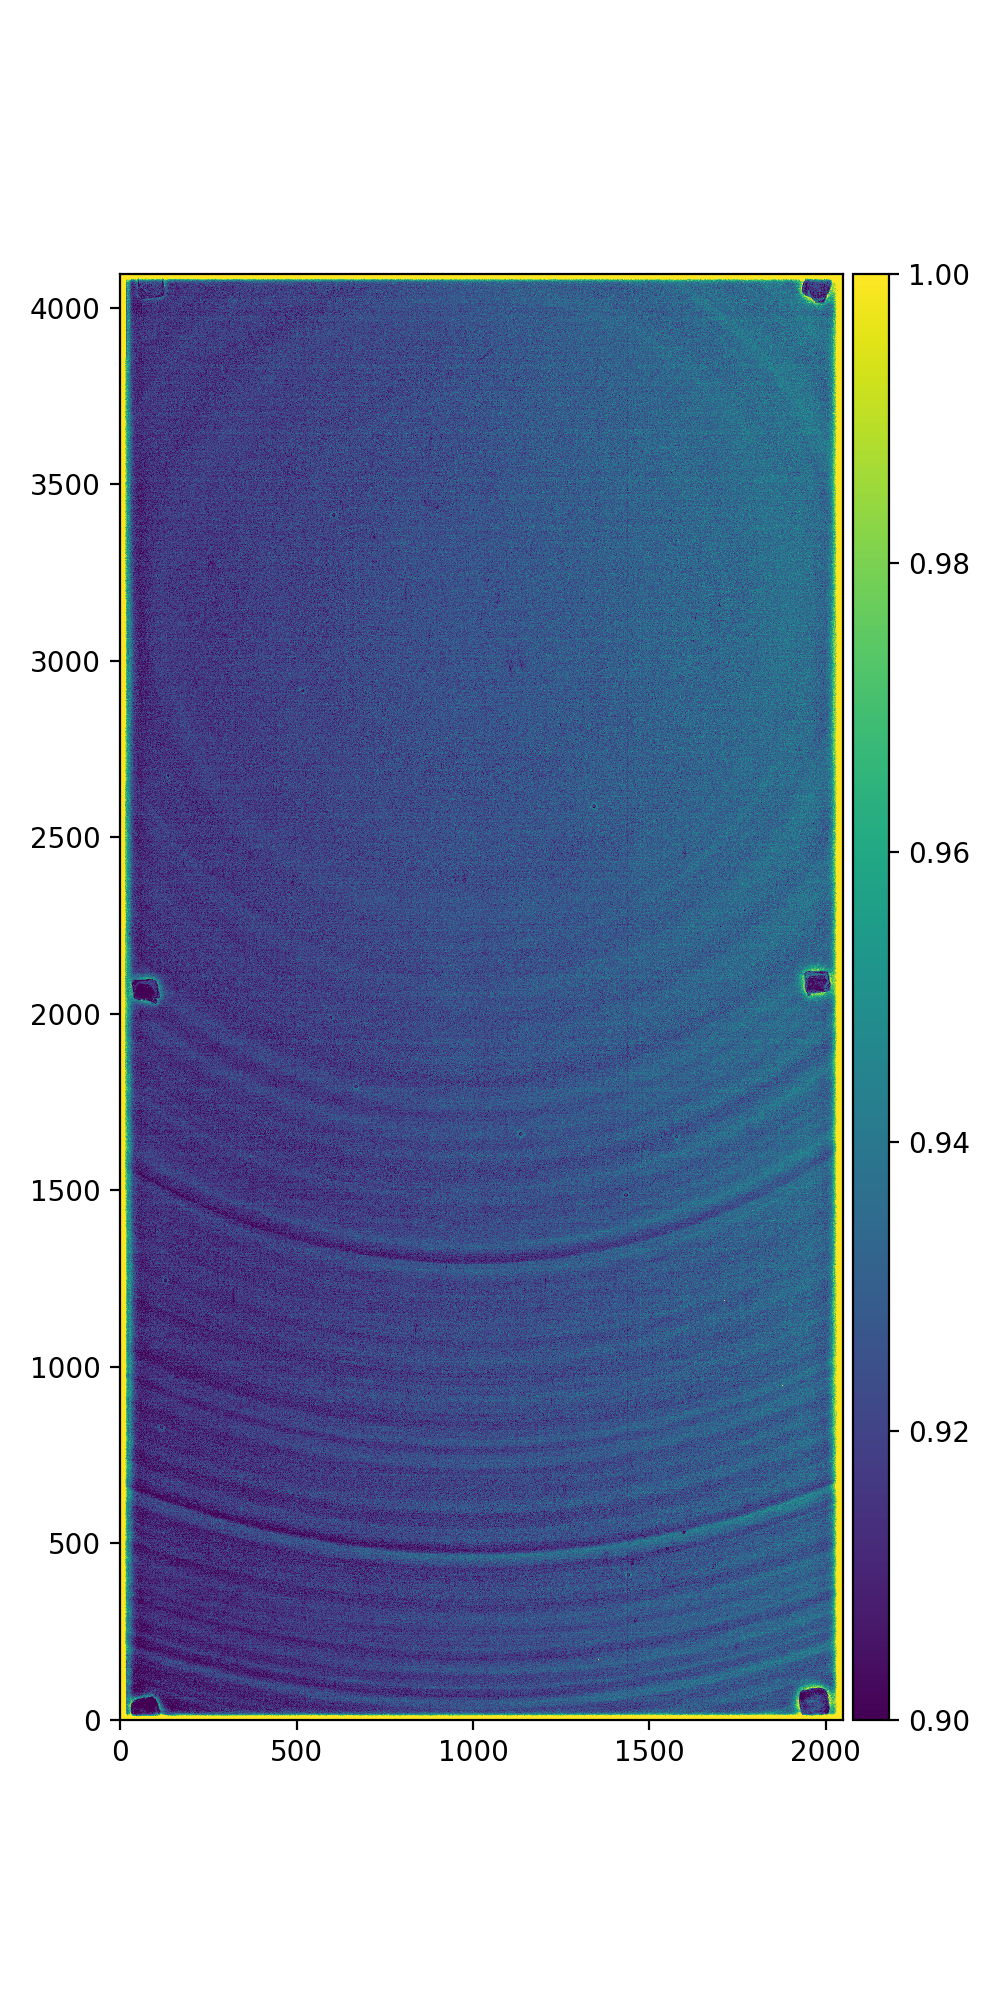

In [22]:
f,ax = plt.subplots(1,1,figsize=(5,10))
h = ax.imshow(iband_flat[0].data,origin='lower',interpolation='None',vmin=0.9,vmax=1.0)
add_colorbar(h)
f.tight_layout()

<IPython.core.display.Javascript object>


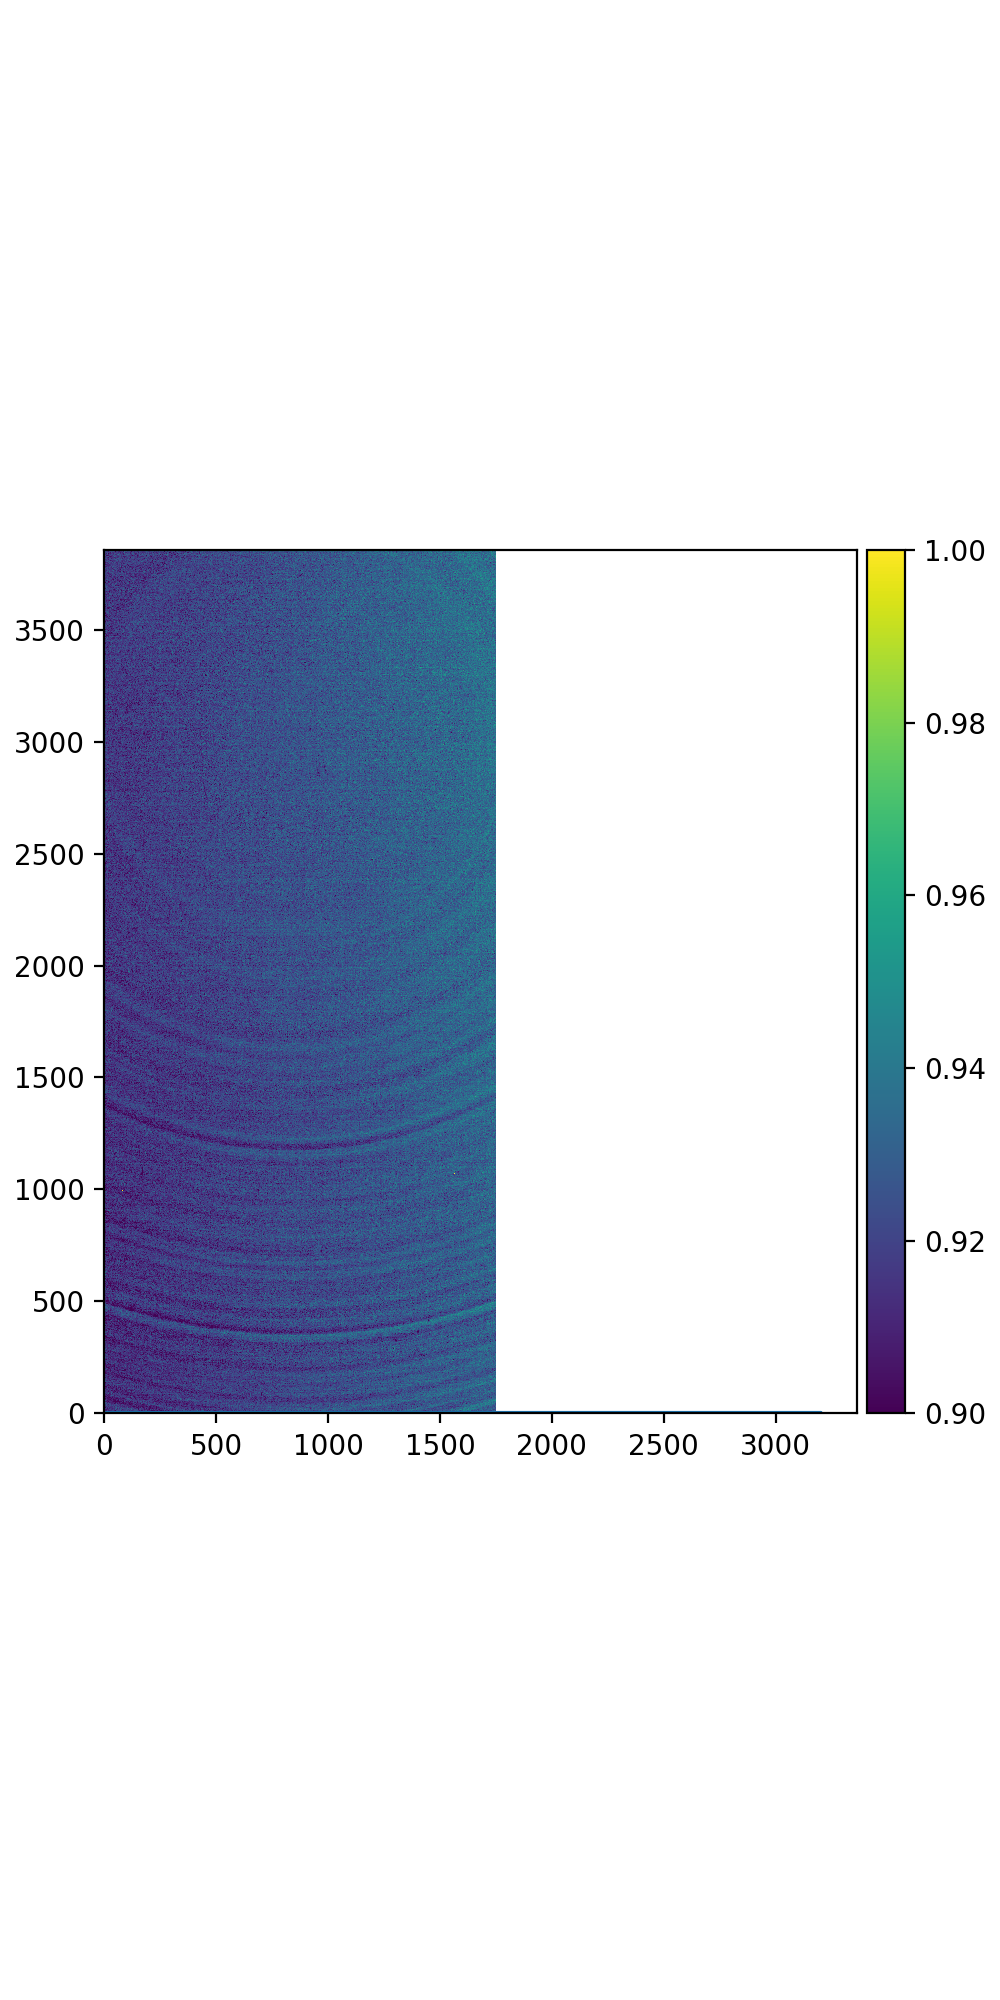

In [24]:
f,ax = plt.subplots(1,1,figsize=(5,10))
h = ax.imshow(iband_flat[0].data[120:-120,150:-150],origin='lower',interpolation='None',vmin=0.9,vmax=1.0)
add_colorbar(h)
f.tight_layout()

In [31]:
def mkFlatTreeRing(ccdname,band):
    # get flat field tree ring projections

    # get CCD number
    iccd = dinfo.infoDict[ccdname]['CCDNUM']   

    filedir = "/u/ec/roodman/kipacdisk/descalib/20151113t1123-r2350/"
    flat = fits.open(filedir + "D_n20151113t1123_%s_c%02d_r2350p02_norm-dflatcor.fits" % (band,iccd))
    ny,nx = flat[0].data.shape
    yval,xval = np.mgrid[0:ny,0:nx]

    # open pixmappy file
    pixmappyfile='/nfs/slac/g/ki/ki06/roodman/Pixmappy/Y6A1_ASTROMETRY/astrorings4.yaml'
    d = yaml.safe_load(open(pixmappyfile,'r'))
    
    # get tree ring center
    pixmappy_table = d[ccdname]
    xpix_center = pixmappy_table['XCenter']
    ypix_center = pixmappy_table['YCenter']
    
    radius = np.sqrt( (yval - ypix_center)**2 + (xval - xpix_center)**2 ) 
    radius = radius[120:-120,150:-150].flatten()
    pixdata = flat[0].data[120:-120,150:-150].flatten()
    meanpix = np.mean(pixdata)
    pixdata = pixdata/meanpix

    x,y,xe,ye = mkProfile(radius,pixdata,nx=300,xmin=np.min(radius),xmax=np.max(radius),ymin=np.min(pixdata),ymax=np.max(pixdata),retPlot=False)
    
    return x,y,xe,ye

In [32]:
xr,yr,xer,yer = mkFlatTreeRing(ccdname='S29',band='r')
xi,yi,xei,yei = mkFlatTreeRing(ccdname='S29',band='i')
xz,yz,xez,yez = mkFlatTreeRing(ccdname='S29',band='z')

<IPython.core.display.Javascript object>


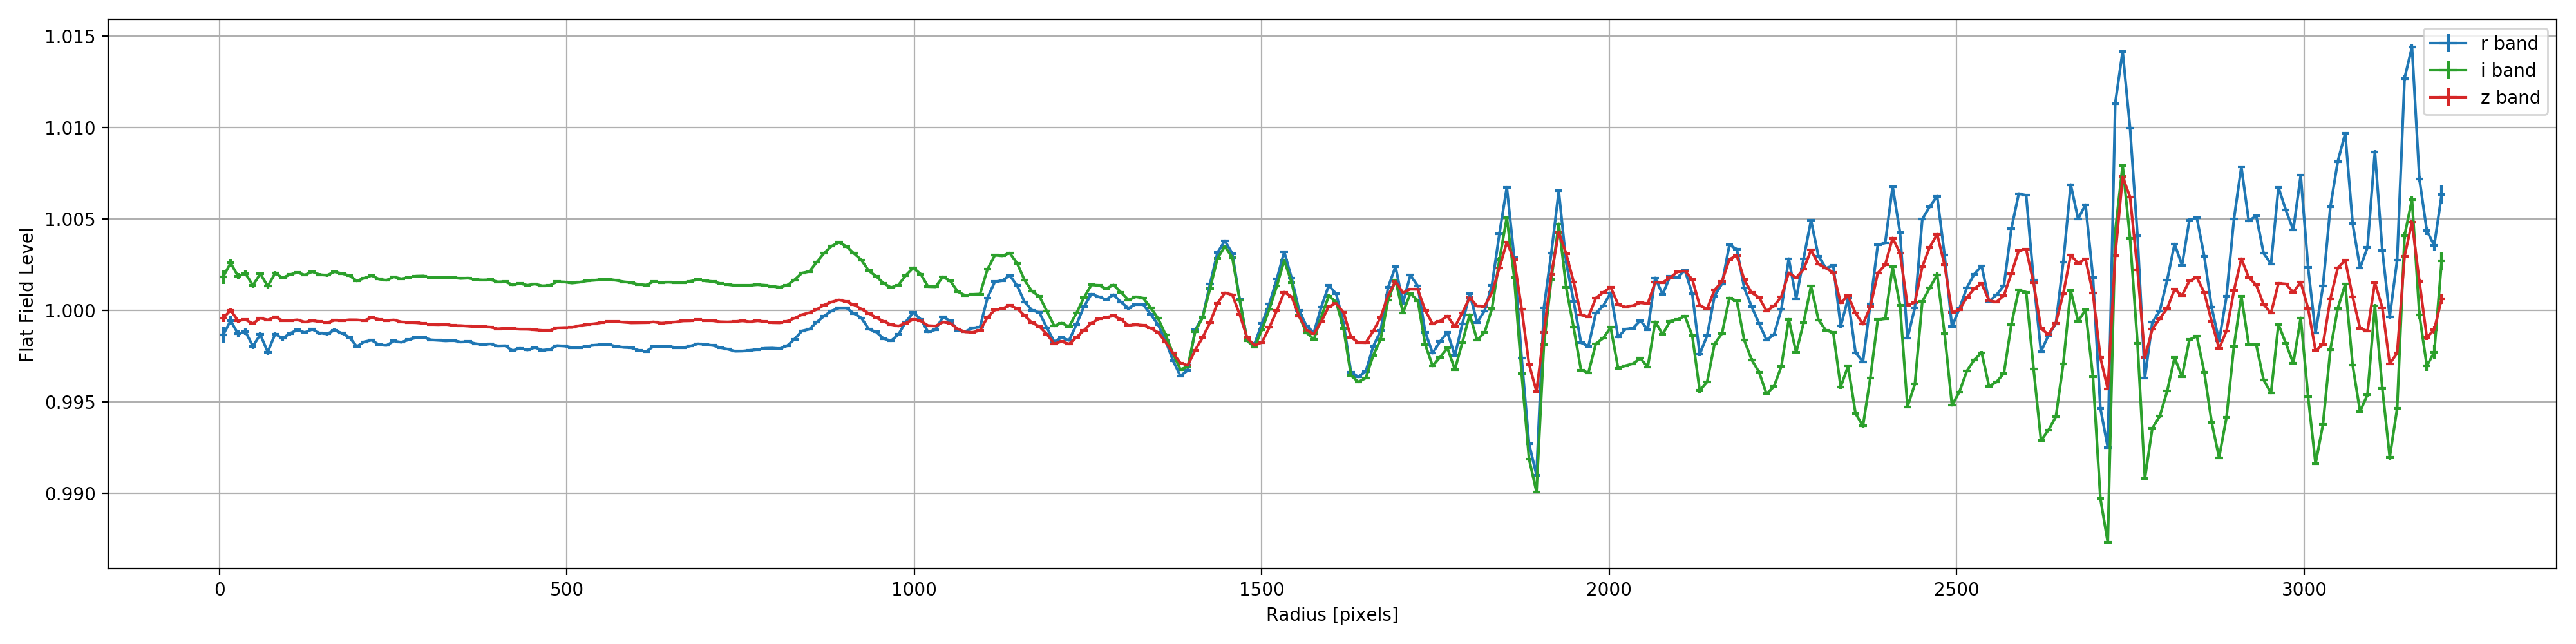

In [33]:
# plot r,i,z bands

f, ax = plt.subplots(figsize=(20,5))

ax.errorbar(xr,yr, xerr=xer, yerr=yer,label = 'r band',color='tab:blue')
ax.errorbar(xi,yi, xerr=xei, yerr=yei,label = 'i band',color='tab:green')
ax.errorbar(xz,yz, xerr=xez, yerr=yez,label = 'z band',color='tab:red')


ax.set_xlabel('Radius [pixels]')
ax.set_ylabel('Flat Field Level')
ax.legend()
ax.grid()

f.tight_layout()

In [34]:
xr,yr,xer,yer = mkFlatTreeRing(ccdname='S3',band='r')
xi,yi,xei,yei = mkFlatTreeRing(ccdname='S3',band='i')
xz,yz,xez,yez = mkFlatTreeRing(ccdname='S3',band='z')

<IPython.core.display.Javascript object>


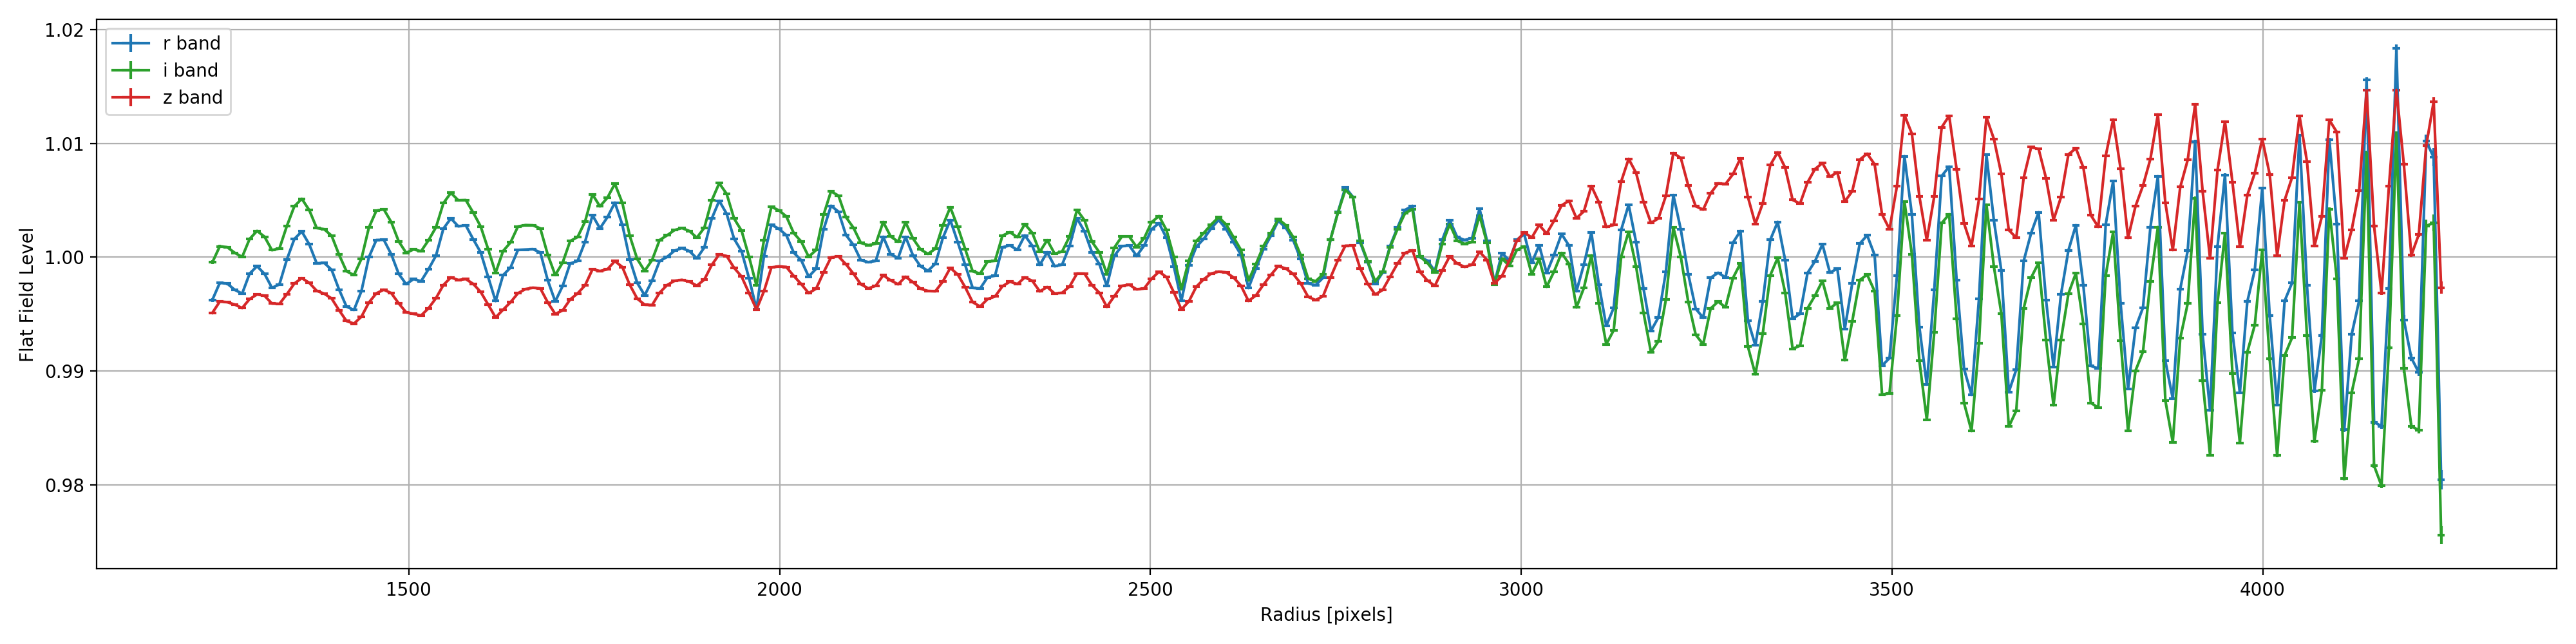

In [35]:
# plot r,i,z bands

f, ax = plt.subplots(figsize=(20,5))

ax.errorbar(xr,yr, xerr=xer, yerr=yer,label = 'r band',color='tab:blue')
ax.errorbar(xi,yi, xerr=xei, yerr=yei,label = 'i band',color='tab:green')
ax.errorbar(xz,yz, xerr=xez, yerr=yez,label = 'z band',color='tab:red')


ax.set_xlabel('Radius [pixels]')
ax.set_ylabel('Flat Field Level')
ax.legend()
ax.grid()

f.tight_layout()